# Cuisine Clustering Using KMeans

In [19]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn import svm
import seaborn
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

In [21]:
#Load target
food_file = "food.csv"
cuisine = pd.read_csv(food_file)
target = {}
i = 0
for cuisineName in cuisine.Cuisine:
    target[cuisineName.lower()] = cuisine.CuisineNumber[i]
    i += 1
    
#Load features
categories = pd.read_csv(food_file)
features_category = {}
i = 0
for category in categories.FoodName:
    features_category[category.lower()] = []
    features_category[category.lower()].append(categories.FoodNumber[i])
    features_category[category.lower()].append(categories.Price[i])
    i += 1
feature = []

for category in categories.FoodName:
    feature.append(features_category[category.lower()])
    
features = np.array(feature)
X, y = features, target.keys()
print X

[[  18.      6.  ]
 [  21.      8.  ]
 [   8.      2.99]
 [   6.      4.49]
 [   9.      5.  ]
 [   9.5     3.01]
 [   7.      7.99]
 [  11.      5.4 ]
 [   9.6     4.56]
 [   8.4     7.45]
 [   9.4     9.12]
 [  32.      7.14]
 [   7.64    6.55]
 [  29.4     7.  ]
 [  41.2     8.  ]
 [  44.     14.2 ]
 [  68.      1.99]
 [  48.     15.44]
 [  51.      9.  ]
 [  52.     14.5 ]
 [  48.1     3.  ]
 [  47.4     6.  ]
 [  62.     29.99]
 [  59.9    10.15]
 [  81.     17.89]
 [  99.      6.87]
 [  86.      6.33]
 [  87.      9.  ]
 [  90.7    12.44]
 [ 111.      2.49]
 [ 119.      8.99]]


In [22]:
model = KMeans(n_clusters=12)
model.fit(X)
#print model.cluster_centers_
dictLabels = {0:"american", 1:"african", 2:"chinese", 3:"ethiopian", 4:"indian",5:"italian",6:"fruit",7:"mandarin", 8:"mexican", 9:"mediterranean", 10:"thai", 11:"vietnamese"}

In [32]:
#Enter calorie value
predictCuisine = [19.6,7.9]
print "KMeans predicted cuisine as '%s'." %dictLabels[model.predict(predictCuisine)[0]]

KMeans predicted cuisine as 'fruit'.


C:\Users\jubin\Anaconda2\lib\site-packages\sklearn\utils\validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


In [25]:
print "Accuracy Score: %d" %model.score(X)

Accuracy Score: -256


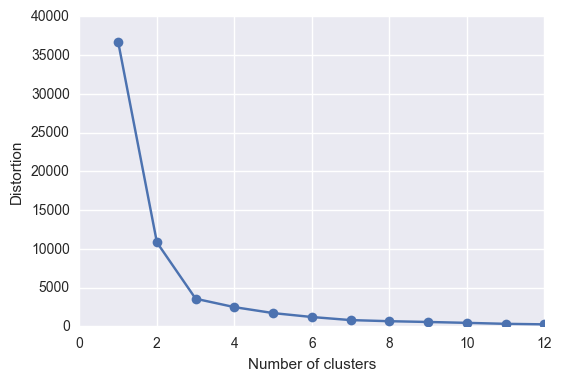

In [24]:
distortions = []
for i in range(1, 13):
    km = KMeans(n_clusters = i, 
               init='k-means++', 
               n_init=10, 
               max_iter=300, 
               random_state=0)
    km.fit(X)
    distortions.append(km.inertia_)
plt.plot(range(1,13), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()